## Figure 4

In [1]:
## This is just the code needed for figure 4, nothing else.  Comes from the Feb_2022_Fig_4_With_Stats
### Start by initalizing what we need
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from io import StringIO

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

from matplotlib.gridspec import GridSpec

In [2]:
input_path = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\data\\'  ##change this to the path where the data is saved
#input_path = 'C:\\Users\\miste\\Google Drive\\Imperial Paper\\data\\'

Root_142 = pd.read_csv(input_path+'142_lifematrix_clean_feb1.txt')
Root_147 = pd.read_csv(input_path+'147_lifematrix_clean_feb1.txt')
Root_182 = pd.read_csv(input_path+'182_lifematrix_clean_feb1.txt')
Root_192 = pd.read_csv(input_path+'192_lifematrix_clean_feb1.txt')
Root_200 = pd.read_csv(input_path+'200_lifematrix_clean_feb1.txt')
Root_208 = pd.read_csv(input_path+'208_lifematrix_clean_feb1.txt')
Root_218 = pd.read_csv(input_path+'218_lifematrix_clean_feb1.txt')
Root_219 = pd.read_csv(input_path+'219_lifematrix_clean_feb1.txt')

In [3]:
from scipy import stats
#stats.ks_2samp(events_cut.Events, events_uncut.Events)
#stats.epps_singleton_2samp(events_cut.Events, events_uncut.Events) #all
#if the p value is below 1%, we assume the two populations are not taken from the same distribution
## or is the error bar too small

In [4]:
# Added index for each cut root
Root_182.columns=np.arange(1,len(Root_182.loc[0])+1)
Root_192.columns=np.arange(1,len(Root_192.loc[0])+1)
Root_200.columns=np.arange(1,len(Root_200.loc[0])+1)
Root_208.columns=np.arange(1,len(Root_208.loc[0])+1)

# Added index for each uncut root
Root_142.columns=np.arange(1,len(Root_142.loc[0])+1)
Root_147.columns=np.arange(1,len(Root_147.loc[0])+1)
Root_218.columns=np.arange(1,len(Root_218.loc[0])+1)
Root_219.columns=np.arange(1,len(Root_219.loc[0])+1)

In [5]:
def time_formatter(root_data):
    root_data_frame = root_data.sum(axis=1, skipna=False).fillna(method='pad').to_frame()
    root_data_frame = root_data_frame.rename(columns = {0:'Events'})
    root_data_frame['Time'] = np.arange(0, len(root_data_frame))*0.25
    return root_data_frame

In [6]:
# Generate timeseries of event for each cut root from life-matrix
Timeseries_root_182=time_formatter(Root_182)
Timeseries_root_192=time_formatter(Root_192)
Timeseries_root_200=time_formatter(Root_200)
Timeseries_root_208=time_formatter(Root_208)

# Generate timeseries of event for each uncut root from life-matrix
Timeseries_root_142=time_formatter(Root_142)
Timeseries_root_147=time_formatter(Root_147)
Timeseries_root_218=time_formatter(Root_218)
Timeseries_root_219=time_formatter(Root_219)

In [7]:
# Generate timeseries of event for each cut root from life-matrix
events_182 = Timeseries_root_182
events_192 = Timeseries_root_192
events_200 = Timeseries_root_200
events_208 = Timeseries_root_208

events_cut = pd.concat([events_182 , events_192, events_200,events_208])

# Generate timeseries of event for each uncut root from life-matrix
events_142 = Timeseries_root_142
events_147 = Timeseries_root_147
events_218 = Timeseries_root_218
events_219 = Timeseries_root_219

#bursts_uncut= np.hstack((bursts_142,bursts_147,bursts_218,bursts_219))
events_uncut= pd.concat([events_142,events_147,events_218,events_219])

In [8]:
#declare how many hours are <6 hr, 6-24hr, 24-72hr, > 72h

events_cut_less_than_6 = events_cut[events_cut['Time']<=6]
events_cut_6_to_24 = events_cut[(events_cut['Time']>6) & (events_cut['Time'] <= 24)]
events_cut_24_72 = events_cut[(events_cut['Time']>24) & (events_cut['Time'] <= 72)]
events_cut_greater_than_72 = events_cut[events_cut['Time']>72]

events_uncut_less_than_6 = events_uncut[events_uncut['Time']<=6]
events_uncut_6_to_24 = events_uncut[(events_uncut['Time']>6) & (events_uncut['Time'] <= 24)]
events_uncut_24_72  = events_uncut[(events_uncut['Time']>24) & (events_uncut['Time'] <= 72)]
events_uncut_greater_than_72 = events_uncut[events_uncut['Time']>72]

events_uncut_less_than_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Events  100 non-null    float64
 1   Time    100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

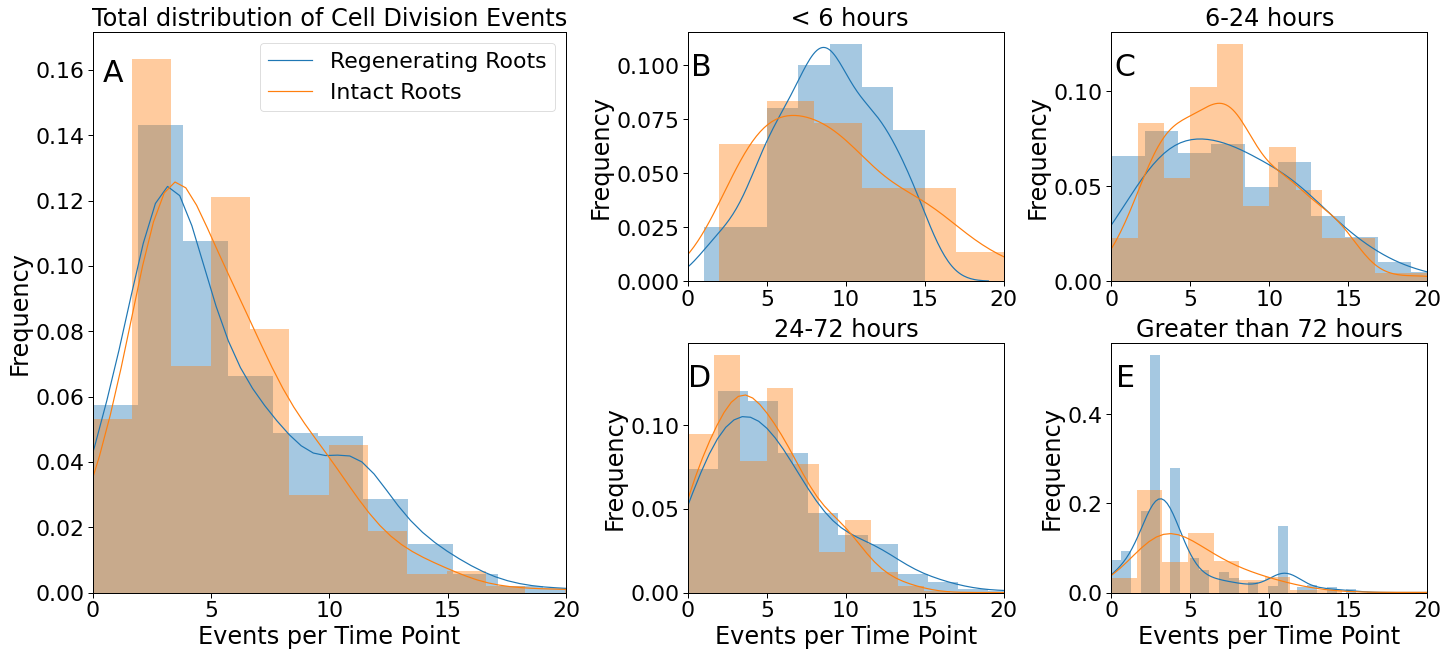

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(20,9))
sns.set_context("paper", font_scale=2.5) 

gs = GridSpec(5, 14, figure=fig)
ax1 = fig.add_subplot(gs[:, 0:6])
ax1 = sns.distplot(events_cut.Events, kde=True, rug=False)  #do a kernel density estimation
ax1 = sns.distplot(events_uncut.Events, kde=True, rug=False, ax=ax1)   #add second axis to the plot
ax1.set(xlabel = 'Events per Time Point', ylabel='Frequency', title='Total distribution of Cell Division Events', xlim=(0,20)) #set the labels
#ax1.get_lines()[0].remove()
#ax1.get_lines()[0].remove()
ax1.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=22) #set the legend
ax1.text(0.065, 0.9, 'A',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='black', fontsize=30)


#ax2
ax2 = fig.add_subplot(gs[0:2,6:10])
ax2 = sns.distplot(events_cut_less_than_6.Events, kde=True, rug=False)  #do a kernel density estimation
ax2 =sns.distplot(events_uncut_less_than_6.Events, kde=True, rug=False, ax=ax2)   #add second axis to the plot
ax2.set(xlabel = '', ylabel='Frequency', title=' < 6 hours', xlim=(0,20)) #set the labels
#ax2.get_lines()[0].remove()
#ax2.get_lines()[0].remove()
ax2.text(0.075, 0.8, 'B',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='black', fontsize=30)
#ax2.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend

#ax3
ax3 = fig.add_subplot(gs[3:, 6:10])
ax3 = sns.distplot(events_cut_24_72.Events, kde=True, rug=False)  #do a kernel density estimation
ax3 = sns.distplot(events_uncut_24_72.Events, kde=True, rug=False, ax=ax3)   #add second axis to the plot
ax3.set(xlabel = 'Events per Time Point', ylabel='Frequency', title='24-72 hours', xlim=(0,20)) #set the labels
#ax3.get_lines()[0].remove()
#ax3.get_lines()[0].remove()
ax3.text(0.075, 0.8, 'D',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='black', fontsize=30)
#ax3.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend

#ax4
ax4 = fig.add_subplot(gs[0:2, 10:])
ax4 = sns.distplot(events_cut_6_to_24.Events, kde=True, rug=False)  #do a kernel density estimation
ax4=sns.distplot(events_uncut_6_to_24.Events, kde=True, rug=False,ax=ax4)   #add second axis to the plot
ax4.set(xlabel = '', ylabel='Frequency', title='6-24 hours', xlim=(0,20)) #set the labels
#ax4.get_lines()[0].remove()
#ax4.get_lines()[0].remove()
ax4.text(0.075, 0.8, 'C',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='black', fontsize=30)
#ax4.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend


#ax5
ax5 = fig.add_subplot(gs[3:, 10:])
ax5 = sns.distplot(events_cut_greater_than_72.Events, kde=True, rug=False)  #do a kernel density estimation
ax5 = sns.distplot(events_uncut_greater_than_72.Events, kde=True, rug=False, ax=ax5)   #add second axis to the plot
ax5.set(xlabel = 'Events per Time Point', ylabel='Frequency', title='Greater than 72 hours', xlim=(0,20)) #set the labels
#ax5.get_lines()[0].remove()
#ax5.get_lines()[0].remove()
ax5.text(0.075, 0.8, 'E',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax5.transAxes,
        color='black', fontsize=30)

#there has got to be a better way to do this then just calling the same function twice, but hey it works, and I'm busy


#ax5.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=18) #set the legend
#fig.suptitle("Cell Divisions Per Frame")


plt.show()

fig.savefig('figure_4_May_13_2022_with_fit_lines.png', facecolor='w', edgecolor='w')
fig.savefig('figure_4_May_13_2022_with_fit_lines.pdf', facecolor='w', edgecolor='w')

## Stats

In [11]:
stats.ks_2samp(events_cut.Events, events_uncut.Events) #all

Ks_2sampResult(statistic=0.07352333283933579, pvalue=9.084248810120599e-05)

In [12]:
stats.ks_2samp(events_cut_less_than_6.Events, events_uncut_less_than_6.Events) #less than 6 hours

Ks_2sampResult(statistic=0.15, pvalue=0.21117008625127576)

In [13]:
stats.ks_2samp(events_cut_6_to_24.Events, events_uncut_6_to_24.Events) #6-24 hours

Ks_2sampResult(statistic=0.052083333333333336, pvalue=0.8304634168517532)

In [14]:
stats.ks_2samp(events_cut_24_72.Events, events_uncut_24_72.Events) #24-72 hours

Ks_2sampResult(statistic=0.07552083333333333, pvalue=0.025012549467709037)

In [15]:
stats.ks_2samp(events_cut_greater_than_72.Events, events_uncut_greater_than_72.Events) #greater than 72 hours

Ks_2sampResult(statistic=0.18687573579358682, pvalue=1.3924594810532653e-10)

In [16]:
stats.epps_singleton_2samp(events_cut.Events, events_uncut.Events)#all

Epps_Singleton_2sampResult(statistic=58.893663926183216, pvalue=4.953879965499748e-12)

In [17]:
stats.epps_singleton_2samp(events_cut_less_than_6.Events, events_uncut_less_than_6.Events) #less than 6 hours

Epps_Singleton_2sampResult(statistic=15.388985084446983, pvalue=0.003958845810706556)

In [18]:
stats.epps_singleton_2samp(events_cut_6_to_24.Events, events_uncut_6_to_24.Events) #6 to 24 hours

Epps_Singleton_2sampResult(statistic=9.222826753076493, pvalue=0.055764893855752104)

In [19]:
stats.epps_singleton_2samp(events_cut_24_72.Events, events_uncut_24_72.Events) #24-72 hours

Epps_Singleton_2sampResult(statistic=34.98632633026523, pvalue=4.6754882274401907e-07)

In [20]:
stats.epps_singleton_2samp(events_cut_greater_than_72.Events, events_uncut_greater_than_72.Events) #greater than 72 hours

Epps_Singleton_2sampResult(statistic=103.83468364705429, pvalue=1.5003167271331173e-21)